## Merging Rows to a data frame 
- when need to create row entries, and some are missing


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [5]:
# Add surname column, but know for 2 people
df['Loc'] = df.index
df.reset_index(inplace= True)
df['Sname'] = pd.Series({0:'Lynn',2:"Tie"})
df

,index,Cost,Item Purchased,Name,Loc,Sname
0,Store 1,22.5,Sponge,Chris,Store 1,Lynn
1,Store 1,2.5,Kitty Litter,Kevyn,Store 1,NaN
2,Store 2,5.0,Spoon,Filip,Store 2,Tie


## Joining data frames  
- on index 
- on columns 
- when columns in joined frames have same names, different information


In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [7]:
# Get information on role and school for everyone ; join on names, which is index
pd.merge(staff_df, student_df, how = 'outer',left_index= True, right_index= True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


### Note that joins keep the joining key as unique, and sort them after joining. 
### Need to be careful about joining on index, as it may not be unique

In [8]:
# Join on columns
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [11]:
# When dframes have same named non-key columns , two different columns are created
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


# Panda Idioms : Best practices

## 1. Vectorized Code 
- Use vectorized functions instead of loops

## 2. Never Chain Index 
df[['a','b']][df['b'] > 0].    
- example of chain indexing, i.e use of [][], this can unpredictably return 
view or copy, and it is slow

## 3. Method Chaining, Readability  
- When chaining, avoid using 'inplace = true' because the subsequent methods operate on a returned dataframe, 
  and 'inplace = True' returns a 'None'

In [14]:
dir = '/Users/sumad/Documents/DS/Python/UM Spcialization/DS_with_Python/'
with open(dir + 'census.csv') as con:
    cs = pd.read_csv(con)

In [15]:
cs.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243286,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [48]:
# Example : filter, drop na, set hierarchical indexcs, rename columns

In [20]:
# This is faster than writing statements, and is readable thanks to wrapping in ()
(cs.where(cs['SUMLEV'] == 50)
 .dropna()
 .set_index(['STNAME','CTYNAME'])
 .rename(columns = {'STATE':'STATE_CODE'})
 .head())

SUMLEV  REGION  DIVISION  STATE_CODE  COUNTY  \
STNAME  CTYNAME                                                        
Alabama Autauga County    50.0     3.0       6.0         1.0     1.0   
        Baldwin County    50.0     3.0       6.0         1.0     3.0   
        Barbour County    50.0     3.0       6.0         1.0     5.0   
        Bibb County       50.0     3.0       6.0         1.0     7.0   
        Blount County     50.0     3.0       6.0         1.0     9.0   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County        54571.0            54571.0          54660.0   
        Baldwin County       182265.0           182265.0         183193.0   
        Barbour County        27457.0            27457.0          27341.0   
        Bibb County           22915.0            22919.0          22861.0   
        Blount County         57322.0            57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County          55253.0          55175.0     ...        
        Baldwin County         186659.0         190396.0     ...        
        Barbour County          27226.0          27159.0     ...        
        Bibb County             22733.0          22642.0     ...        
        Blount County           57711.0          57776.0     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243286         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

## 4. Functional programming
- Use of functional programming to chain operations together 
- typically, use map in python, similar method is apply for dataframe objects 
-  use of lambda functions with map

In [41]:
# Compute min max of popultion estimates across years, years being in cols in the DataFrame
import numpy as np
def min_max_pop(row, cols):
    row = row[cols] # col selection
    row['min'] = np.min(row)
    row['max'] = np.max(row)
    return row
    

In [42]:
cols_select = ['POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015']


In [43]:
from functools import partial  
new_min_max_pop = partial(min_max_pop, cols = cols_select)

### Apply method on a Pandas data frame, applies the function  passed (which operates on a sequence) to rows or columns based on axis argument

In [44]:
df_min_max = cs.apply(new_min_max_pop, axis = 1)

In [45]:
type(df_min_max)

pandas.core.frame.DataFrame

In [46]:
df_min_max.head()

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,min,max
0,4785161,4801108,4816089,4830533,4846411,4858979,4785161,4858979
1,54660,55253,55175,55038,55290,55347,54660,55347
2,183193,186659,190396,195126,199713,203709,183193,203709
3,27341,27226,27159,26973,26815,26489,26489,27341
4,22861,22733,22642,22512,22549,22583,22512,22861


In [51]:
# can use lambda function also
new_df = cs.apply(lambda x : np.min(x[cols_select]), axis = 1)
          
new_df.head()

0    4785161
1      54660
2     183193
3      26489
4      22512
dtype: int64

#### Example : the United States is broken up into four regions using the "REGION" column. 

Create a query that finds the counties that belong to regions 1 or 2, whose name starts with 'Washington', and whose POPESTIMATE2015 was greater than their POPESTIMATE 2014

In [77]:
def answer():
    m1 = cs['SUMLEV']== 50
    m2 = (cs['REGION'] == 1) | (cs['REGION'] == 2)
    m3 = cs['POPESTIMATE2015'] > cs['POPESTIMATE2014']
    m4 = [x for x in map(lambda x: x.startswith('Washington'), cs['CTYNAME'])]
    results = cs.loc[(m1) & (m2) & (m3) & (m4),['STNAME', 'CTYNAME']].sort_index(ascending = True)
    return results
answer()

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


## Group By 
- groupby splits a dataframe, returns a tuple with a key and a grouped data frame identifiable by key, which is the unique values of column used to group, the grouped dataframe is a split dataframe by key value.  The key and dataframe can be iterated upon.  
  - Instead of a column, a function can be passed that operates on index or column and creates the key to be split on. 
- split-compute-combine :  groupby has a method agg, that takes a dictionary of column and method to apply, then applies the method on column across grouped data frames, and returns a summarized data frame by key, columnname as name of the column operated on 
  - A column selection can be applied on grouped data frames by simply passing a list of column names on grouped object.  
  - grouped data frames can be of two types, grouped Series (if a single col. is selected)  and grouped dataframes

In [59]:
# Avg. 2010 pop by state
(cs.loc[cs['SUMLEV'] == 50,:]
.groupby('STNAME').agg({'CENSUS2010POP': np.average})
.head())

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [69]:
# Same Group by bisecting first alphabet of state to 3 parts, construct this as a function, use this function to group by
def state_grp(x):
    if (x[0] < 'E'):
        return 1
    if (x[0] < 'M'):
        return 2
    return 3    
        

cs.set_index('STNAME').groupby(state_grp).agg({'CENSUS2010POP':np.average})

,CENSUS2010POP
1,377840.778116
2,151103.787774
3,181356.161242


In [72]:
# Group by, a set of operations on a set of columns. 
## In this case you name the dictionary keys in agg to be the output column of the operation which is value to the key
## argument level in group by, used to group by a level of multi-level index
cs.set_index('STNAME').groupby(level =0)['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012'].agg({'add': np.sum,
                                                                                  'avg' :np.average}).head()

/Users/sumad/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


add                                             avg  \
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2012 POPESTIMATE2010   
STNAME                                                                       
Alabama            9570322         9602216         9632178    1.407400e+05   
Alaska             1428042         1445440         1462456    4.760140e+04   
Arizona           12816416        12937464        13106524    8.010260e+05   
Arkansas           5844788         5877076         5898998    7.690511e+04   
California        74668158        75400068        76112110    1.265562e+06   

                                            
           POPESTIMATE2011 POPESTIMATE2012  
STNAME                                      
Alabama       1.412091e+05    1.416497e+05  
Alaska        4.818133e+04    4.874853e+04  
Arizona       8.085915e+05    8.191578e+05  
Arkansas      7.732995e+04    7.761839e+04  
California    1.277967e+06    1.290036e+06

#### You can perform custom operation through functions on grouped data frames as well, and summarize them by key

In [76]:
# Sum population across top three counties (top by population) of each state, output top 2 states by total of this pop.
grps = cs.loc[cs['SUMLEV']== 50,].groupby('STNAME')
result = pd.Series()
import numpy as np
for key, grp in grps:
    tot_pop = (grp.sort_values(by = 'CENSUS2010POP',ascending = False, inplace = False).
                reset_index().loc[[0,1,2],'CENSUS2010POP'].sum())
    result[key] = tot_pop   
result.head()        

Alabama        1406269.0
Alaska          478402.0
Arizona        5173150.0
Arkansas        807152.0
California    15924150.0
dtype: float64

### Measurement Scales and Handling in Pandas  
- Pandas let you define ordinal data, and separate is from nominal (called categorical). 
  - As a result comparison operations can be performed to some end like masking, without encoding ordinal data to numeric values
- Dummy Variables Creation  
- Cutting a ratio/interval to ordered categories

In [88]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D', 'D-'],
            index = [3*['excellent'] + 3*['Good'] + 3*['Avg'] + 2*['Poor']], columns = ['Grades'])
df

,Grades
excellent,A+
excellent,A
excellent,A-
Good,B+
Good,B
Good,B-
Avg,C+
Avg,C
Avg,C-
Poor,D


In [100]:
grades_cat = df['Grades'].astype(dtype= 'category') # Series object
grades_cat

excellent    A+
excellent     A
excellent    A-
Good         B+
Good          B
Good         B-
Avg          C+
Avg           C
Avg          C-
Poor          D
Poor         D-
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D-]

In [95]:
# Ordered series , specify categories in low to high and have ordered flag as True
grades_ord = df['Grades'].astype(dtype= 'category', categories = ['D-', 'D', 'C-', 'C', 'C+', 'B-', "B", "B+", 'A-',
                                                                  'A', 'A+'], ordered = True)
grades_ord

excellent    A+
excellent     A
excellent    A-
Good         B+
Good          B
Good         B-
Avg          C+
Avg           C
Avg          C-
Poor          D
Poor         D-
Name: Grades, dtype: category
Categories (11, object): [D- < D < C- < C ... B+ < A- < A < A+]

In [96]:
grades_ord > 'C'

excellent     True
excellent     True
excellent     True
Good          True
Good          True
Good          True
Avg           True
Avg          False
Avg          False
Poor         False
Poor         False
Name: Grades, dtype: bool

### Dummy Variable creation in Pandas
- One hot encoding 
- n-1 encoding

In [101]:
pd.get_dummies(grades_cat)

,A,A+,A-,B,B+,B-,C,C+,C-,D,D-
excellent,0,1,0,0,0,0,0,0,0,0,0
excellent,1,0,0,0,0,0,0,0,0,0,0
excellent,0,0,1,0,0,0,0,0,0,0,0
Good,0,0,0,0,1,0,0,0,0,0,0
Good,0,0,0,1,0,0,0,0,0,0,0
Good,0,0,0,0,0,1,0,0,0,0,0
Avg,0,0,0,0,0,0,0,1,0,0,0
Avg,0,0,0,0,0,0,1,0,0,0,0
Avg,0,0,0,0,0,0,0,0,1,0,0
Poor,0,0,0,0,0,0,0,0,0,1,0


In [102]:
pd.get_dummies(grades_ord,drop_first= True)

,D,C-,C,C+,B-,B,B+,A-,A,A+
excellent,0,0,0,0,0,0,0,0,0,1
excellent,0,0,0,0,0,0,0,0,1,0
excellent,0,0,0,0,0,0,0,1,0,0
Good,0,0,0,0,0,0,1,0,0,0
Good,0,0,0,0,0,1,0,0,0,0
Good,0,0,0,0,1,0,0,0,0,0
Avg,0,0,0,1,0,0,0,0,0,0
Avg,0,0,1,0,0,0,0,0,0,0
Avg,0,1,0,0,0,0,0,0,0,0
Poor,1,0,0,0,0,0,0,0,0,0


#### Cut 
-  Create equal spaced n intervals 
- Create equal frequency intervals 

In [109]:
df = cs.loc[cs['SUMLEV'] == 50].groupby('STNAME').agg({'CTYNAME' : "count"})
df.head()

,CTYNAME
STNAME,
Alabama,67
Alaska,29
Arizona,15
Arkansas,75
California,58


In [116]:
pd.cut(df['CTYNAME'],bins= 5,include_lowest= True).sort_values() # series object

STNAME
Wyoming                  (0.746, 51.6]
New Jersey               (0.746, 51.6]
New Mexico               (0.746, 51.6]
Massachusetts            (0.746, 51.6]
Maryland                 (0.746, 51.6]
Maine                    (0.746, 51.6]
Oregon                   (0.746, 51.6]
Rhode Island             (0.746, 51.6]
Nevada                   (0.746, 51.6]
Idaho                    (0.746, 51.6]
Hawaii                   (0.746, 51.6]
South Carolina           (0.746, 51.6]
Utah                     (0.746, 51.6]
Alaska                   (0.746, 51.6]
Arizona                  (0.746, 51.6]
Vermont                  (0.746, 51.6]
Connecticut              (0.746, 51.6]
Washington               (0.746, 51.6]
Delaware                 (0.746, 51.6]
District of Columbia     (0.746, 51.6]
New Hampshire            (0.746, 51.6]
Oklahoma                 (51.6, 102.2]
Tennessee                (51.6, 102.2]
West Virginia            (51.6, 102.2]
Ohio                     (51.6, 102.2]
North Dakota      

### Pivot Tables in Pandas
- When you can break data into buckets using multiple variables, apply and aggregation and compare. 
- BUILD THE BUCKET BY SPECIFYING COLUMNS IN 'INDEX' AND 'COLUMNS' ARGUMENTS  
- Can create a view by specifying multiple agg functions as a list, define custom functions as well

In [119]:
file = '/Users/sumad/Documents/DS/Python/UM Spcialization/DS_with_Python' + '/mpg.csv' 
with open(file) as con:
    df = pd.read_csv(con)

In [120]:
df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [125]:
# For a class of cars, has the mileage increased over model years 
pd.pivot_table(df,index= ['class'],columns= ['year'],values= ['hwy', 'cty'],aggfunc= [np.mean, np.max],margins= True)

mean                                                         \
                  cty                              hwy                         
year             1999       2008        All       1999       2008        All   
class                                                                          
2seater     15.500000  15.333333  15.400000  24.500000  25.000000  24.800000   
compact     19.760000  20.545455  20.127660  27.920000  28.727273  28.297872   
midsize     18.150000  19.333333  18.756098  26.500000  28.047619  27.292683   
minivan     16.166667  15.400000  15.818182  22.500000  22.200000  22.363636   
pickup      13.000000  13.000000  13.000000  16.812500  16.941176  16.878788   
subcompact  21.578947  18.937500  20.371429  29.000000  27.125000  28.142857   
suv         13.379310  13.606061  13.500000  17.551724  18.636364  18.129032   
All         17.017094  16.700855  16.858974  23.427350  23.452991  23.440171   

            amax                                
             cty               hwy              
year        1999  2008   All  1999  2008   All  
class                                           
2seater     16.0  16.0  16.0  26.0  26.0  26.0  
compact     33.0  28.0  33.0  44.0  37.0  44.0  
midsize     21.0  23.0  23.0  29.0  32.0  32.0  
minivan     18.0  17.0  18.0  24.0  24.0  24.0  
pickup      16.0  17.0  17.0  20.0  22.0  22.0  
subcompact  35.0  26.0  35.0  44.0  36.0  44.0  
suv         18.0  20.0  20.0  25.0  27.0  27.0  
All         35.0  28.0  35.0  44.0  37.0  44.0

### Date Time  in Pandas   
Four main classes to handle time in pandas
- Timestamp. : to represent a point in time
- Timestamp Index : When timestamp class is used to create an index in a data frame/series, it generates an object of
  class TimestampIndex
- Period : To represent a period of time, like a day, month
- Period Index: When period is used to create an index in a data frame/series, it generates an object of
  class PeriodIndex  
- COnvert dates in strings to datetime format
- Timedeltas  
- Dataframes with DatetimeIndex : Slicing, aggregating by periods, plotting, changing freq

In [126]:
import pandas as pd
import numpy as np

#### Timestamp, similar to dattime structure in python

In [129]:
pd.Timestamp('2017-01-10 8:05AM')

Timestamp('2017-01-10 08:05:00')

#### Period

In [130]:
pd.Period('2017-01')

Period('2017-01', 'M')

In [131]:
pd.Period('2016-01-07')

Period('2016-01-07', 'D')

#### DatetimeIndex

In [142]:
df = pd.DataFrame(list('abcd'), index = [pd.Timestamp('2017-01-01'), pd.Timestamp('2017-01-08'), 
                                         pd.Timestamp('2017-01-15'), pd.Timestamp('2017-01-22')])
df

,0
2017-01-01,a
2017-01-08,b
2017-01-15,c
2017-01-22,d


In [143]:
df.index

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22'], dtype='datetime64[ns]', freq=None)

#### PeriodIndex

In [145]:
df = pd.DataFrame(list('abcd'), index = [pd.Period('2017-01'), pd.Period('2017-02'), 
                                         pd.Period('2017-03'), pd.Period('2017-05')])
df

,0
2017-01,a
2017-02,b
2017-03,c
2017-05,d


In [146]:
df.index

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-05'], dtype='period[M]', freq='M')

#### How to bring dates in proper shape in an index - pd.to_datetime

In [149]:
dates = ['2017-July-02', 'Aug 03 1985', '3/17/19']
df = pd.DataFrame(list('abc'), index = pd.to_datetime(dates) )
df.index

DatetimeIndex(['2017-07-02', '1985-08-03', '2019-03-17'], dtype='datetime64[ns]', freq=None)

#### Timedeltas

In [150]:
pd.Timestamp('2017-02-13') - pd.Timestamp('2017-02-12')

Timedelta('1 days 00:00:00')

In [154]:
# Creating a timedelta
pd.Timedelta('2D 3H')

Timedelta('2 days 03:00:00')

In [156]:
pd.Timestamp('2017-02-13') + pd.Timedelta('2D 3H')

Timestamp('2017-02-15 03:00:00')

#### Working with dates in a data frame by creating a DatetimeIndex

In [169]:
# Creating a datetime index
ind = pd.date_range(start= '01-07-2017',periods= 9,freq= '2W-MON')
ind

DatetimeIndex(['2017-01-09', '2017-01-23', '2017-02-06', '2017-02-20',
               '2017-03-06', '2017-03-20', '2017-04-03', '2017-04-17',
               '2017-05-01'],
              dtype='datetime64[ns]', freq='2W-MON')

In [178]:
counts1 = np.cumsum(np.random.randint(low = 1,high = 40,size= 9))
counts2 = np.cumsum(np.random.randint(low = 10,high = 40,size= 9))

In [185]:
df = pd.DataFrame({"counts1" : counts1, "counts2" : counts2}, index = ind)
df

,counts1,counts2
2017-01-09,18,37
2017-01-23,24,54
2017-02-06,54,68
2017-02-20,75,105
2017-03-06,101,124
2017-03-20,128,154
2017-04-03,154,190
2017-04-17,160,200
2017-05-01,169,210


In [187]:
df.index.day

Int64Index([9, 23, 6, 20, 6, 20, 3, 17, 1], dtype='int64')

In [188]:
# weekday name
df.index.weekday_name

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday'],
      dtype='object')

In [189]:
# Finding difference between values of consecutive datetimes
df.diff()

,counts1,counts2
2017-01-09,NaN,NaN
2017-01-23,6.0,17.0
2017-02-06,30.0,14.0
2017-02-20,21.0,37.0
2017-03-06,26.0,19.0
2017-03-20,27.0,30.0
2017-04-03,26.0,36.0
2017-04-17,6.0,10.0
2017-05-01,9.0,10.0


In [192]:
# Filtering by month a datetime belongs to
df['2017-02']

,counts1,counts2
2017-02-06,54,68
2017-02-20,75,105


In [194]:
# Creating a summary by month
df.resample('M').mean()

,counts1,counts2
2017-01-31,21.0,45.5
2017-02-28,64.5,86.5
2017-03-31,114.5,139.0
2017-04-30,157.0,195.0
2017-05-31,169.0,210.0


In [195]:
# Slicing using dates
df['2017-03-20':]

,counts1,counts2
2017-03-20,128,154
2017-04-03,154,190
2017-04-17,160,200
2017-05-01,169,210


In [197]:
# Changing frequency from 2W to 1 W, without a method, will get NaNs
df.asfreq('W',method= 'ffill')

,counts1,counts2
2017-01-15,18,37
2017-01-22,18,37
2017-01-29,24,54
2017-02-05,24,54
2017-02-12,54,68
2017-02-19,54,68
2017-02-26,75,105
2017-03-05,75,105
2017-03-12,101,124
2017-03-19,101,124


In [200]:
# Plotting a pandas series with DatetimeIndex
from matplotlib import pyplot as plt
%matplotlib inline

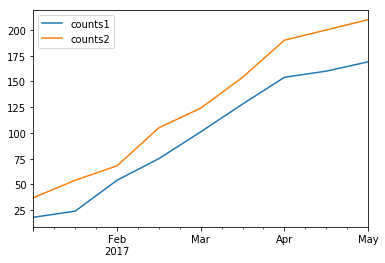

In [201]:
df.plot()